# Multilayer Perceptron

## Step Function

In [4]:
def stepFunction(x):
    if(x>0):
        return 1
    else:
        return 0

In [5]:
stepFunction(-308)

0

In [9]:
inputs = [1,250,-3,0,500,800,-900]

In [10]:
for input in inputs:
    print(f'input is {input}, and output of step is {stepFunction(input)}')

input is 1, and output of step is 1
input is 250, and output of step is 1
input is -3, and output of step is 0
input is 0, and output of step is 0
input is 500, and output of step is 1
input is 800, and output of step is 1
input is -900, and output of step is 0


Improving `step` to process multiple items using numpy.

In [11]:
import numpy as np

In [13]:
x = np.array([1,250,-2,0,500])
x>0

array([ True,  True, False, False,  True])

In [14]:
(x>0).astype(int)

array([1, 1, 0, 0, 1])

In [18]:
def stepFunction(x):
    return (x>0).astype(int)

In [19]:
stepFunction(x)

array([1, 1, 0, 0, 1])

Plotting `step`. 

In [21]:
import matplotlib.pyplot as plt

In [23]:
x = np.arange(-20.0,20.0,0.1)
y = stepFunction(x)

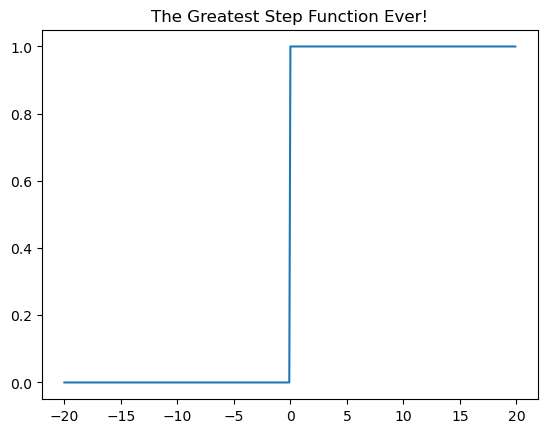

In [25]:
plt.plot(x,y)
plt.title('The Greatest Step Function Ever!')
plt.show()

## Sigmoid Function

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Lets plot `sigmoid` to see if the function is properly written.

In [27]:
y = sigmoid(x)

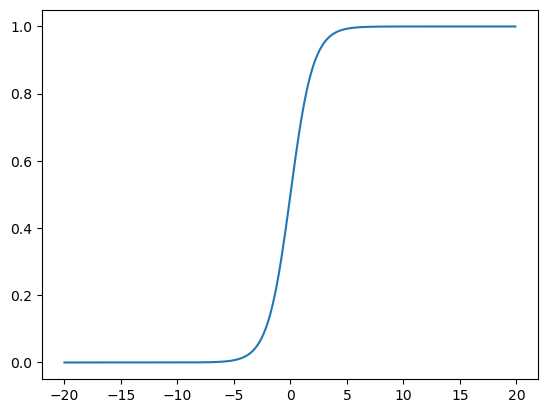

In [29]:
plt.plot(x,y)
plt.show()

## Multi Dimensional Array

In [30]:
w = np.array([[1,3,5],[2,4,6]])

In [31]:
x = np.array([10,20])

In [32]:
x*w

ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

In [33]:
y = np.dot(x,w)

In [34]:
x.shape

(2,)

In [35]:
w.shape

(2, 3)

## Multi-Layer Perceptron

In [36]:
x = np.array([1.3,3.141592])

In [47]:
w1 = np.array([[0.7,0.9,0.5],[0.5,0.4,0.1]])

In [48]:
b1 = np.array([1,1,1])

In [49]:
a1 = np.dot(x,w1)+b1

In [50]:
a1

array([3.480796 , 3.4266368, 1.9641592])

In [51]:
z1 = sigmoid(a1)

In [52]:
z1

array([0.97013639, 0.96852671, 0.87698237])

In [53]:
w2 = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])

In [54]:
b2 = np.array([0.5, 0.5])

In [55]:
a2 = np.dot(z1, w2) + b2

In [56]:
a2

array([1.27437408, 1.3835239 ])

In [57]:
z2 = sigmoid(a2)

In [58]:
z2

array([0.7814906 , 0.79955636])

In [59]:
def identity(x):
    return x

In [60]:
w3 = np.array([[0.7,0.1],[0.123,0.456]])

In [61]:
b3 = np.array([0.1,0.2])

In [62]:
a3 = np.dot(z2,w3)+b3

In [63]:
z3 = identity(a3)

In [64]:
z3

array([0.74538885, 0.64274676])

## Making some functions for MLP

In [65]:
def init_network():
    net = {}
    # layer 1
    net['w1'] = np.array([[0.7, 0.9, 0.3],[0.5, 0.4, 0.1]])
    net['b1'] = np.array([1, 1, 1])
    # layer 2
    net['w2'] = np.array([ [0.2, 0.3], [0.4, 0.5], [0.22, 0.1234] ])
    net['b2'] = np.array([0.5, 0.5])
    # layer 3 <-- output
    net['w3'] = np.array([ [0.7, 0.1], [0.123, 0.314] ])
    net['b3'] = np.array([0.1, 0.2])

    return net

def forward(net, x):
    w1, w2, w3 = net['w1'], net['w2'], net['w3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = identity(a3)

    return y

In [66]:
net = init_network()
y = forward(net, np.array([7.0, 2.0]))

In [67]:
y

array([0.75050477, 0.53158747])

## MultiLayer Perceptron Class

In [74]:
class MultiLayerPerceptron:

    """
    A class representing a simple multilayer perceptron neural network.
    This class initializes the network with predefined weights and biases.

    
    Attributes:
    Network (dict): A dictionary containing the network's weights and biases.
        The keys are 'w1', 'b1', 'w2', 'b2', 'w3', 'b3' for the layers.

        
    Methods:
        sigmoid(s): Applies the sigmoid activation function to an input.
        identity_function(s): Returns the input as is (identity function).
        forward(x): Performs forward propagation through the network given an input.
    
    Example usage:
    >>> mlp = MultilayerPerceptron()
    >>> input = np.array([0.12345,0.31423])
    >>> output = mlp.forward(input)
    >>> print(output)
    
    """

    def __init__(self):
        self.net = {}
        pass

    def init_network(self):
        net = {}
        # layer 1
        net['w1'] = np.array([[0.7, 0.9, 0.3],[0.5, 0.4, 0.1]])
        net['b1'] = np.array([1, 1, 1])
        # layer 2
        net['w2'] = np.array([ [0.2, 0.3], [0.4, 0.5], [0.22, 0.1234] ])
        net['b2'] = np.array([0.5, 0.5])
        # layer 3 <-- output
        net['w3'] = np.array([ [0.7, 0.1], [0.123, 0.314] ])
        net['b3'] = np.array([0.1, 0.2])

        self.net = net

    def forward(self, x):
        w1, w2, w3 = self.net['w1'], self.net['w2'], self.net['w3']
        b1, b2, b3 = self.net['b1'], self.net['b2'], self.net['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.identity(a3)

        return y
    
    def identity(self, x):
        return x
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

In [75]:
mlp = MultiLayerPerceptron()
mlp.init_network()
y = mlp.forward(np.array([7.2, 2.7]))

In [76]:
y

array([0.75064055, 0.53163901])

In [77]:
print(MultiLayerPerceptron.__doc__)


    A class representing a simple multilayer perceptron neural network.
    This class initializes the network with predefined weights and biases.

    
    Attributes:
    Network (dict): A dictionary containing the network's weights and biases.
        The keys are 'w1', 'b1', 'w2', 'b2', 'w3', 'b3' for the layers.

        
    Methods:
        sigmoid(s): Applies the sigmoid activation function to an input.
        identity_function(s): Returns the input as is (identity function).
        forward(x): Performs forward propagation through the network given an input.
    
    Example usage:
    >>> mlp = MultilayerPerceptron()
    >>> input = np.array([0.12345,0.31423])
    >>> output = mlp.forward(input)
    >>> print(output)
    
    
